In [10]:
!git config user.email "naazshafeer@gmail.com"
!git config user.name "Naaz Shafeer"

Test for AGN.FITS file

In [113]:
import matplotlib
import matplotlib.text

matplotlib.text.Text(text=  'x', fontproperties= 'Times New Roman')  # lol, still in process in figuriing out on how to change the font

Text(0, 0, 'x')

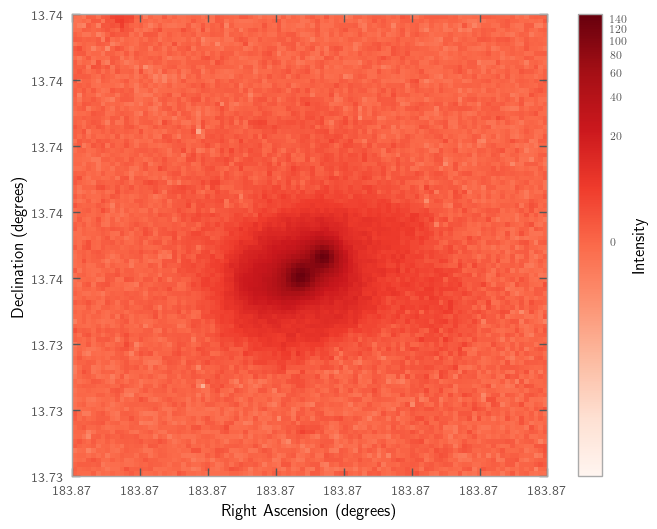

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot
from matplotlib import rc
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)



fits_image_filename = 'FITS FILES/agn.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut = -5, max_cut=150)
im = ax.imshow(image_data, cmap='Reds', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12, )  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax = ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()



This is the trials for fixing the scale issues and mostly the axes (RA and ticksmarks) issues

In [18]:
from astropy.io import fits


fits_image_filename = 'agn.fits'
f = fits.open(fits_image_filename)


print(f[0].header)


wcs = WCS(f[0].header)

print("Ref Pixel", wcs.wcs.crpix)
print("Coord Value at Ref PIxel", wcs.wcs.crval)
print("Pixel Scale", wcs.wcs.cdelt)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  100 / Axis length                                    NAXIS2  =                  100 / Axis length                                    EXTEND  =                    T / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2020-10-23T22:16:16' / Date FITS file was generated                  IRAF-TLM= '2020-10-23T22:16:13' / Time of last modification                     OBJECT  = 'J1215+1344'         / Name of the object observed                    EQUINOX =        2000.00000000 / Mean equinox                                   MJD-OBS =   5.890100000000E+04 / [d] MJD of observation                         RADESYS = 'ICRS    '           / Equator

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_30839/2799984724.py:15: RuntimeWarning: cdelt will be ignored since cd is present
  print("Pixel Scale", wcs.wcs.cdelt)


In [19]:
from astropy.io import fits
fits_image_filename = fits.open('agn.fits')

print(fits_image_filename)


Testing with different fits files :)

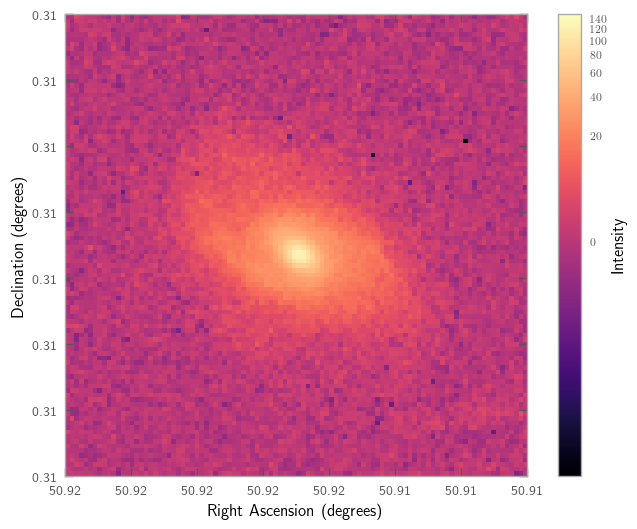

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

plt.style.use(astropy_mpl_style)


fits_image_filename = 'FITS FILES/J0323+0018.fits'


with fits.open(fits_image_filename) as hdul:
    image_data = hdul[0].data
    wcs = WCS(hdul[0].header)


ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


fig, ax = plt.subplots()


extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
norm = simple_norm(image_data, stretch='log', power = 2.0, asinh_a= 0.22, min_cut= -5, max_cut=150)
im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
ax.grid(False)



cbar = plt.colorbar(im, ax=ax, label='Intensity')
cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


plt.show()
#messed around with colorbar to control whcih quantiites will be assigned with max and min


Making of Class and Function

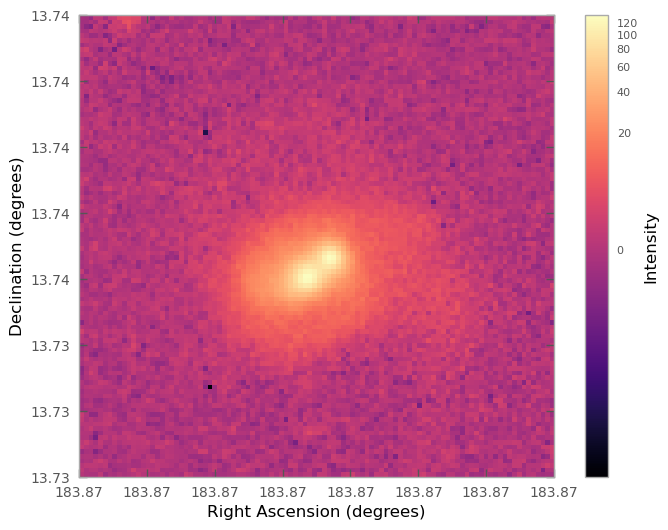

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import simple_norm

#use data classes to assign properties, default properties and change through specific things that oyu put in
#my main idea is to make a a class that will take a file that will be the input that the use puts in 
#and then this class/function will go through the code I made above and spit out a graph that has good details
#along with the name of the fits file, with important information found in the fits file

class FITS_analyzer:
    def __init__(self, file):
        self.file = file
    def analyze(self):
        with fits.open(self.file) as hdul:
            image_data = hdul[0].data
            wcs = WCS(hdul[0].header)


        ysize, xsize = image_data.shape

        xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize])


        fig, ax = plt.subplots()


        extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]
        norm = simple_norm(image_data, stretch='log', power=2.0, asinh_a=0.5)
        im = ax.imshow(image_data, cmap='magma', norm=norm, origin='upper', aspect='equal', extent=extent)


        x_ticks = np.linspace(xcorner[0], xcorner[1], 8)
        y_ticks = np.linspace(ycorner[0], ycorner[1], 8)

        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

        ax.set_xticklabels([f'{val:.2f}' for val in x_ticks], fontsize=10)  
        ax.set_yticklabels([f'{val:.2f}' for val in y_ticks], fontsize=10)  
        ax.tick_params(axis='both', direction='in', length=6, width=1, which='both', top=True, right=True)


        ax.set_xlabel('Right Ascension (degrees)', fontsize=12)  # Specify font size for x-axis label
        ax.set_ylabel('Declination (degrees)', fontsize=12)  # Specify font size for y-axis label
        ax.grid(False)



        cbar = plt.colorbar(im, ax=ax, label='Intensity')
        cbar.ax.tick_params(labelsize=8)  # Specify smaller font size for colorbar ticks
        cbar.set_label('Intensity', fontsize=12)  # Specify font size for colorbar label


file_path = 'FITS FILES/agn.fits' #had to use relative path, need to update class so that any input(from downloads) will be able to output
analyzer = FITS_analyzer(file_path)
analyzer.analyze()
    
    
            




Modelling 2-Body Problem 

In [1]:
import scipy as sci
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

This example is for Alpha Centauri stars

In [2]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [3]:
#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/3612775721.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/3612775721.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/3612775721.py:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/3612775721.py:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")


In [4]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [5]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/2360341432.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/2360341432.py:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,8,500) #8 orbital periods and 500 points
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/2639122596.py:12: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((dr1bydt,dr2bydt))
/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_21471/2639122596.py:13: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  derivs=sci.concatenate((r_der

In [9]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

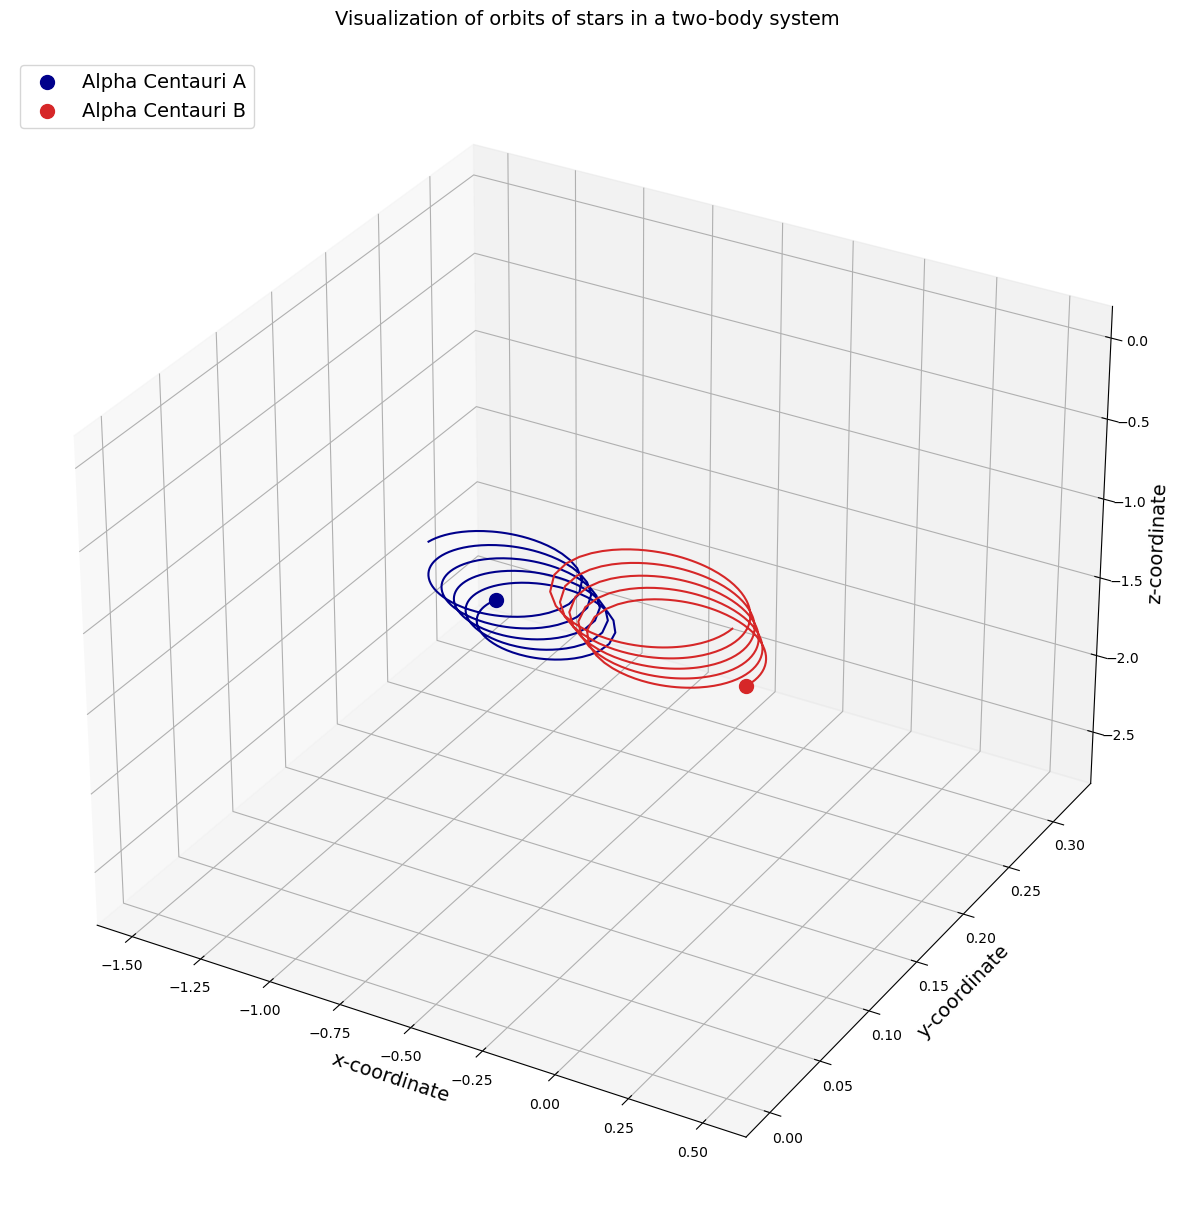

In [14]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)